## SHREE KRISHNA KANTH S
## 225229136
## II MSc DATA SCIENCE - "A"
## PDL LAB 5 (TAMIL)

In [1]:
import numpy as np

def load_data():
    with open('Happy_Quotes.txt', 'r', encoding='utf-8') as f:
        Happy_Quotes = f.readlines()
    with open('Sad_Quotes.txt', 'r', encoding='utf-8') as f:
        Sad_Quotes = f.readlines()

    quotes = Happy_Quotes + Sad_Quotes
    labels = np.concatenate([np.ones(len(Happy_Quotes)), np.zeros(len(Sad_Quotes))])

    return quotes, labels

quotes, labels = load_data()

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

def preprocess_data(quotes):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(quotes)
    sequences = tokenizer.texts_to_sequences(quotes)
    vocab_size = len(tokenizer.word_index) + 1

    max_sequence_length = max(len(seq) for seq in sequences)
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

    return padded_sequences, vocab_size

X, vocab_size = preprocess_data(quotes)

In [3]:
load_data()

(['1. மகிழ்ச்சி ஒரு அமைதி புதிய ஒளி ஆகும்.\n',
  '2. எப்போதும் சந்தோஷமாக இருங்கள், வாழ்க்கை நலமாக இருக்கும்.\n',
  '3. சிரிப்பு ஒரு மிகுந்த அரிய மருத்துவம்.\n',
  '4. மகிழ்ச்சியால் மனிதர் சிறகுகள் விழுங்குகின்றன.\n',
  '5. மகிழ்ச்சியே மகிழ்ச்சி! அது உங்களுக்கு புதிய நாள் கொடுக்கும்.\n',
  '6. மகிழ்ச்சி எப்போதும் உங்களுக்கு நலமாக இருக்க வேண்டும்.\n',
  '7. சிரிப்பு வாழ்க்கைக்கு குடியும் அமையும்.\n',
  '8. மகிழ்ச்சி உங்கள் இரவுகளையும் நாள்களையும் சுவாரஸ்யமாக மாற்றும்.\n',
  '9. சிரிப்பு உங்கள் மனதில் இருக்கும்போது நீங்கள் உயிருக்குள் கிடைக்கும்.\n',
  '10. மகிழ்ச்சி உங்கள் காரியங்களில் வாழ்வின் ரகசியம் ஆகும்.\n',
  '11. மகிழ்ச்சி மனதில் உள்ளது மற்றும் உலகத்தின் உள்ளங்களைப் பகிரும்.\n',
  '12. சிரிப்பு எல்லா துறைகளின் மேலும் ஒளியாக உள்ளது.\n',
  '13. மகிழ்ச்சி மனிதரின் முகத்தில் ஒளியாக விளங்குகிறது.\n',
  '14. சிரிப்பு உன் வாழ்க்கைக்கு புது முகம் கொடுக்கும்.\n',
  '15. மகிழ்ச்சி நாள் நாளாக வருகின்றது.\n',
  '16. சிரிப்பு எப்போதும் அன்பு தருகின்றது.\n',
  '17. மகிழ்ச்சி ஒரு மகிழ்ச்சி மற்று

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(nodes=32, layers=1, vocab_size=None, input_length=None):
    model = Sequential()
    model.add(Dense(input_dim=vocab_size, output_dim=nodes, input_length=input_length))

    for _ in range(layers):
        model.add(Dense(nodes, activation='relu'))
    model.add(Dense(nodes, activation='relu'))
    
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [5]:
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)

def train_and_evaluate_model(nodes, layers):
    model = create_model(nodes=nodes, layers=layers)
    start_time = time.time()
    model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=1)
    end_time = time.time()
    _, train_accuracy = model.evaluate(X_train, y_train)
    _, test_accuracy = model.evaluate(X_test, y_test)
    return train_accuracy, test_accuracy, end_time - start_time

nodes_list = [6, 32, 64, 128, 256, 512, 1024]
layers_list = [1, 2, 3, 4, 5]

results = {}

best_accuracy = 0
best_config = None

for nodes in nodes_list:
    if nodes == 32:  
        for layers in layers_list:
            train_accuracy, test_accuracy, running_time = train_and_evaluate_model(nodes, layers)
            results[(nodes, layers)] = {
                "Train Accuracy": train_accuracy,
                "Test Accuracy": test_accuracy,
                "Running Time": running_time
            }
            if test_accuracy > best_accuracy:
                best_accuracy = test_accuracy
                best_config = (nodes, layers)
    else:
        layers = 1
        train_accuracy, test_accuracy, running_time = train_and_evaluate_model(nodes, layers)
        results[(nodes, layers)] = {
            "Train Accuracy": train_accuracy,
            "Test Accuracy": test_accuracy,
            "Running Time": running_time
        }
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_config = (nodes, layers)

for config, values in results.items():
    node, layers = config
    print("Node: {}, Layers: {}".format(node, layers))
    print("Training Accuracy:", values["Train Accuracy"])
    print("Testing Accuracy:", values["Test Accuracy"])
    print("Running Time:", values["Running Time"])
    print("-" * 30)

Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6922 - accuracy: 0.6042
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 0.6909 - accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.6896 - accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 0.6884 - accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 0s 19ms/step - loss: 0.6887 - accuracy: 0.6154
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.6926 - accuracy: 0.5208
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 0.6887 - accuracy: 0.6667
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 0.6849 - accuracy: 0.6667
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 0.6810 - accuracy: 0.6667
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 0.6792 - accuracy: 0.6154
Epoch 1/5
1/1 [==============================] -

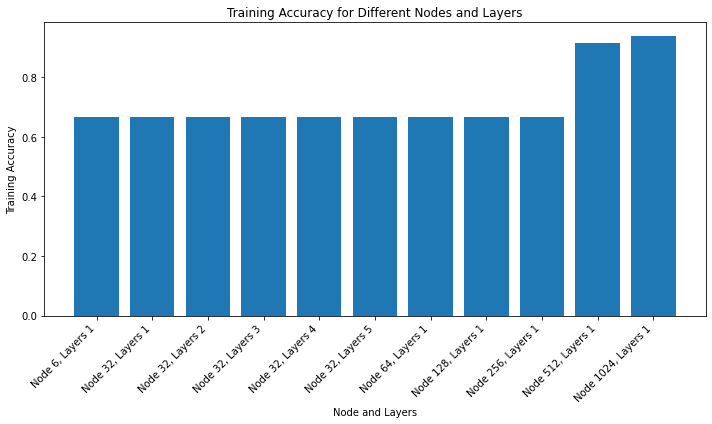

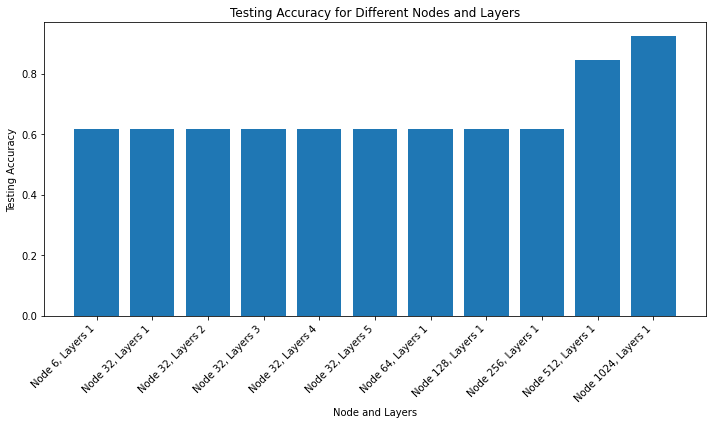

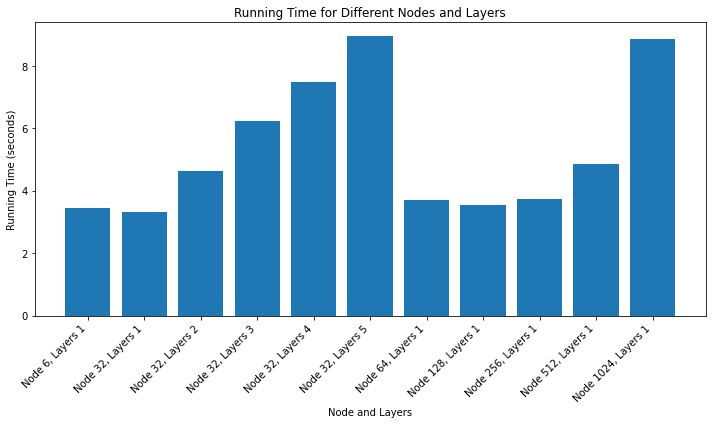

BEST CONFIGURATION: (1024, 1)
Components of the Best Configuration:
Training Accuracy: 0.9375
Testing Accuracy: 0.9230769276618958
Running Time: 8.857020616531372


In [6]:
x_labels = ["Node {}, Layers {}".format(node, layers) for node, layers in results.keys()]
train_accuracies = [values["Train Accuracy"] for values in results.values()]
test_accuracies = [values["Test Accuracy"] for values in results.values()]
running_times = [values["Running Time"] for values in results.values()]

plt.figure(figsize=(10, 6))
plt.bar(x_labels, train_accuracies)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Node and Layers")
plt.ylabel("Training Accuracy")
plt.title("Training Accuracy for Different Nodes and Layers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x_labels, test_accuracies)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Node and Layers")
plt.ylabel("Testing Accuracy")
plt.title("Testing Accuracy for Different Nodes and Layers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(x_labels, running_times)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Node and Layers")
plt.ylabel("Running Time (seconds)")
plt.title("Running Time for Different Nodes and Layers")
plt.tight_layout()
plt.show()

print("BEST CONFIGURATION:", best_config)
print("Components of the Best Configuration:")
print("Training Accuracy:", results[best_config]["Train Accuracy"])
print("Testing Accuracy:", results[best_config]["Test Accuracy"])
print("Running Time:", results[best_config]["Running Time"])


In [7]:
def read_text_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

def preprocess_text(text):
    words = text.strip().replace("\n", " ").split(" ")
    words = [word.strip() for word in words if word.strip()]
    return words

def count_word_frequency(words):
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return word_frequency

happy_quotes_text = read_text_from_file("Happy_Quotes.txt")
happy_quotes_words = preprocess_text(happy_quotes_text)
happy_quotes_word_frequency = count_word_frequency(happy_quotes_words)

sad_quotes_text = read_text_from_file("Sad_Quotes.txt")
sad_quotes_words = preprocess_text(sad_quotes_text)
sad_quotes_word_frequency = count_word_frequency(sad_quotes_words)

print("Word Frequency for Happy Quotes:")
for word, frequency in happy_quotes_word_frequency.items():
    print(f"{word}: {frequency}")

print("\nWord Frequency for Sad Quotes:")
for word, frequency in sad_quotes_word_frequency.items():
    print(f"{word}: {frequency}")

Word Frequency for Happy Quotes:
1.: 1
மகிழ்ச்சி: 10
ஒரு: 4
அமைதி: 1
புதிய: 2
ஒளி: 1
ஆகும்.: 3
2.: 1
எப்போதும்: 3
சந்தோஷமாக: 1
இருங்கள்,: 1
வாழ்க்கை: 1
நலமாக: 3
இருக்கும்.: 1
3.: 1
சிரிப்பு: 8
மிகுந்த: 1
அரிய: 1
மருத்துவம்.: 1
4.: 1
மகிழ்ச்சியால்: 1
மனிதர்: 1
சிறகுகள்: 1
விழுங்குகின்றன.: 1
5.: 1
மகிழ்ச்சியே: 1
மகிழ்ச்சி!: 1
அது: 1
உங்களுக்கு: 2
நாள்: 2
கொடுக்கும்.: 2
6.: 1
இருக்க: 1
வேண்டும்.: 1
7.: 1
வாழ்க்கைக்கு: 2
குடியும்: 1
அமையும்.: 1
8.: 1
உங்கள்: 4
இரவுகளையும்: 1
நாள்களையும்: 1
சுவாரஸ்யமாக: 1
மாற்றும்.: 1
9.: 1
மனதில்: 2
இருக்கும்போது: 1
நீங்கள்: 1
உயிருக்குள்: 1
கிடைக்கும்.: 1
10.: 1
காரியங்களில்: 1
வாழ்வின்: 1
ரகசியம்: 1
11.: 1
உள்ளது: 2
மற்றும்: 4
உலகத்தின்: 1
உள்ளங்களைப்: 1
பகிரும்.: 1
12.: 1
எல்லா: 1
துறைகளின்: 1
மேலும்: 1
ஒளியாக: 2
உள்ளது.: 1
13.: 1
மனிதரின்: 1
முகத்தில்: 1
விளங்குகிறது.: 1
14.: 1
உன்: 2
புது: 1
முகம்: 1
15.: 1
நாளாக: 1
வருகின்றது.: 1
16.: 1
அன்பு: 2
தருகின்றது.: 2
17.: 1
18.: 1
சந்தோஷம்: 1
மகிழ்ச்சியைத்: 1
19.: 1
மனதை: 1
புதுமாக: 1
செய்கிறது.: 1
20.: 1
உ

In [8]:
from tabulate import tabulate

def read_text_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

def preprocess_text(text):
    words = text.strip().replace("\n", " ").split(" ")
    words = [word.strip() for word in words if word.strip()]
    return words

def count_word_frequency(words):
    word_frequency = {}
    for word in words:
        if word in word_frequency:
            word_frequency[word] += 1
        else:
            word_frequency[word] = 1
    return word_frequency

def create_table(word_frequency):
    table = []
    for word, frequency in word_frequency.items():
        table.append([word, frequency])
    return table

happy_quotes_text = read_text_from_file("Happy_Quotes.txt")
happy_quotes_words = preprocess_text(happy_quotes_text)
happy_quotes_word_frequency = count_word_frequency(happy_quotes_words)

# Read and preprocess the Sad_Quotes.txt
sad_quotes_text = read_text_from_file("Sad_Quotes.txt")
sad_quotes_words = preprocess_text(sad_quotes_text)
sad_quotes_word_frequency = count_word_frequency(sad_quotes_words)

# Display the word frequency for Happy Quotes in a table
print("Word Frequency for Happy Quotes:")
happy_quotes_table = create_table(happy_quotes_word_frequency)
print(tabulate(happy_quotes_table, headers=["Word", "Frequency"], tablefmt="pretty"))

# Display the word frequency for Sad Quotes in a table
print("\nWord Frequency for Sad Quotes:")
sad_quotes_table = create_table(sad_quotes_word_frequency)
print(tabulate(sad_quotes_table, headers=["Word", "Frequency"], tablefmt="pretty"))

Word Frequency for Happy Quotes:
+----------------+-----------+
|      Word      | Frequency |
+----------------+-----------+
|       1.       |     1     |
|    மகிழ்ச்சி     |    10     |
|      ஒரு       |     4     |
|     அமைதி      |     1     |
|     புதிய      |     2     |
|      ஒளி       |     1     |
|     ஆகும்.      |     3     |
|       2.       |     1     |
|    எப்போதும்     |     3     |
|    சந்தோஷமாக    |     1     |
|    இருங்கள்,     |     1     |
|     வாழ்க்கை     |     1     |
|     நலமாக      |     3     |
|    இருக்கும்.    |     1     |
|       3.       |     1     |
|    சிரிப்பு     |     8     |
|     மிகுந்த     |     1     |
|      அரிய      |     1     |
|   மருத்துவம்.    |     1     |
|       4.       |     1     |
|   மகிழ்ச்சியால்   |     1     |
|     மனிதர்      |     1     |
|    சிறகுகள்     |     1     |
| விழுங்குகின்றன.  |     1     |
|       5.       |     1     |
|   மகிழ்ச்சியே    |     1     |
|    மகிழ்ச்சி!    |     1     |
|      அது

In [10]:
!pip install tamil

In [14]:
!pip install git+https://github.com/libindic/indic_nlp_library.git

  Cloning https://github.com/libindic/indic_nlp_library.git to c:\users\shree\appdata\local\temp\pip-req-build-niewmxin


  Running command git clone -q https://github.com/libindic/indic_nlp_library.git 'C:\Users\shree\AppData\Local\Temp\pip-req-build-niewmxin'
  fatal: helper error (-1): User cancelled dialog.
  bash: line 1: /dev/tty: No such device or address
  error: failed to execute prompt script (exit code 1)
  fatal: could not read Username for 'https://github.com': No such file or directory
ERROR: Command errored out with exit status 128: git clone -q https://github.com/libindic/indic_nlp_library.git 'C:\Users\shree\AppData\Local\Temp\pip-req-build-niewmxin' Check the logs for full command output.


In [13]:
from tamil import Tokenizer as TamilTokenizer

def read_text_from_file(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

def preprocess_text(text):
    # Use the TamilTokenizer for tokenization
    tokenizer = TamilTokenizer()
    sentences = tokenizer.tokenize(text)
    return sentences

def count_character_frequency(sentences):
    character_frequency = {}
    for sentence in sentences:
        for char in sentence:
            if char in character_frequency:
                character_frequency[char] += 1
            else:
                character_frequency[char] = 1
    return character_frequency

happy_quotes_text = read_text_from_file("Tamil_Happy_Quotes.txt")
sad_quotes_text = read_text_from_file("Tamil_Sad_Quotes.txt")

happy_quotes_sentences = preprocess_text(happy_quotes_text)
sad_quotes_sentences = preprocess_text(sad_quotes_text)

happy_quotes_character_frequency = count_character_frequency(happy_quotes_sentences)
sad_quotes_character_frequency = count_character_frequency(sad_quotes_sentences)

print("Character Frequency for Happy Quotes:")
for char, frequency in happy_quotes_character_frequency.items():
    print(f"{char}: {frequency}")

print("\nCharacter Frequency for Sad Quotes:")
for char, frequency in sad_quotes_character_frequency.items():
    print(f"{char}: {frequency}")

ImportError: cannot import name 'Tokenizer' from 'tamil' (C:\Users\shree\anaconda3\lib\site-packages\tamil\__init__.py)